C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_2956\1219864602.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Shares Traded'].fillna(df['Shares Traded'].median(), inplace=True)
C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_2956\1219864602.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

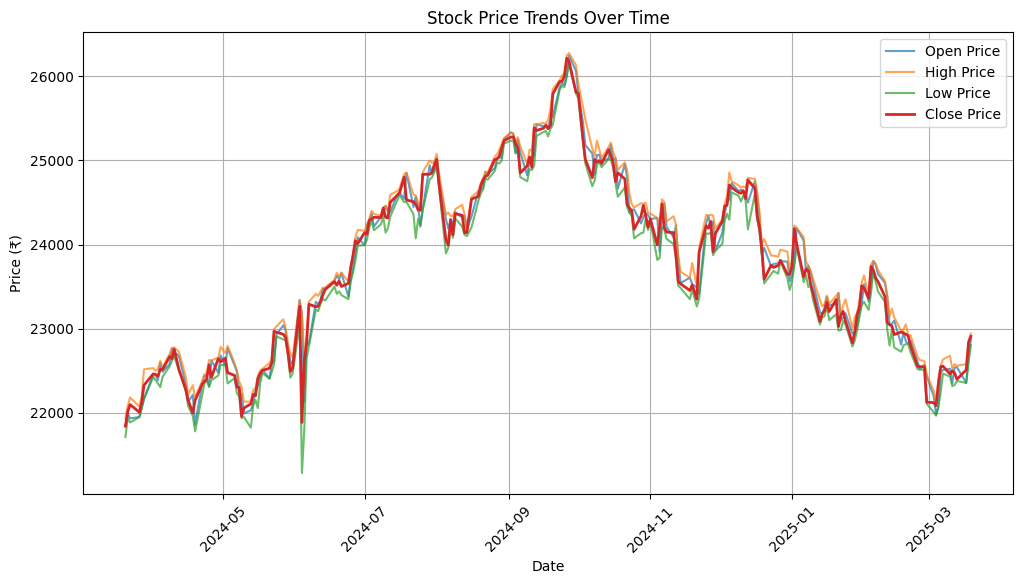

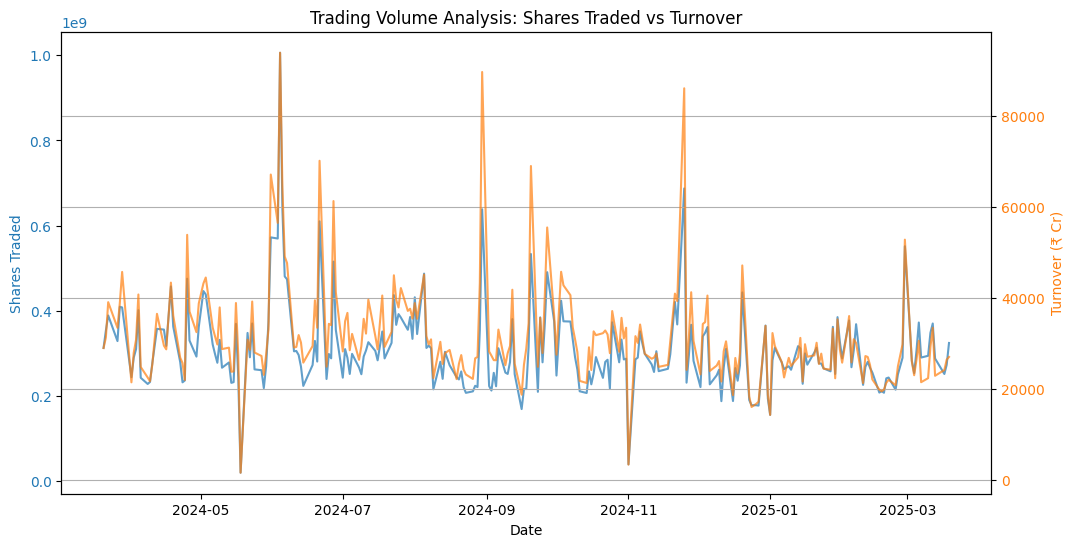

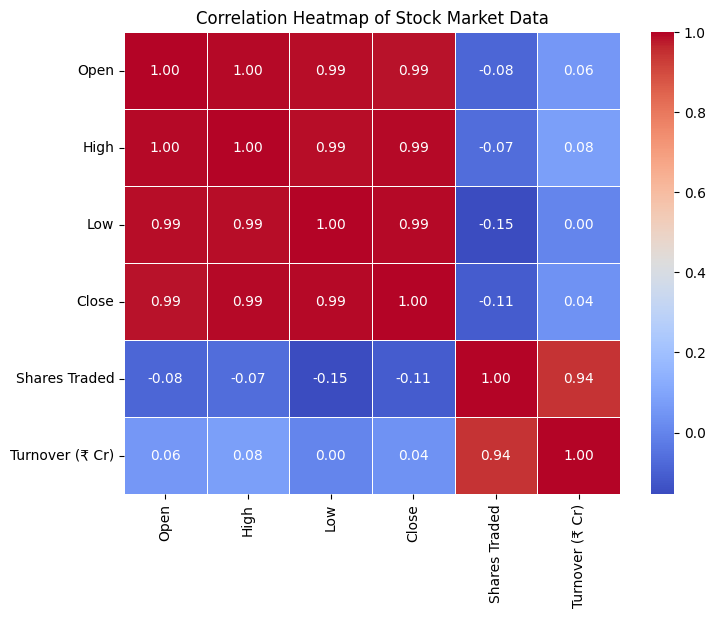

Model Accuracy: 48.00%


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Dataset
file_path = r"D:\Finsight-Bharat\NIFTY 50-20-03-2024-to-20-03-2025.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
df = df.sort_values(by='Date')

# Fill missing values
df['Shares Traded'].fillna(df['Shares Traded'].median(), inplace=True)
df['Turnover (₹ Cr)'].fillna(df['Turnover (₹ Cr)'].median(), inplace=True)

# Visualization: Stock Price Trends
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open Price', alpha=0.7)
plt.plot(df['Date'], df['High'], label='High Price', alpha=0.7)
plt.plot(df['Date'], df['Low'], label='Low Price', alpha=0.7)
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.title('Stock Price Trends Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Visualization: Trading Volume Analysis
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Shares Traded', color=color)
ax1.plot(df['Date'], df['Shares Traded'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Turnover (₹ Cr)', color=color)
ax2.plot(df['Date'], df['Turnover (₹ Cr)'], color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Trading Volume Analysis: Shares Traded vs Turnover')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap
corr_matrix = df.drop(columns=['Date']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Market Data")
plt.show()

# Predictive Model: Classifying Next Day's Stock Movement
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
features = ['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (₹ Cr)']
X = df[features][:-1]  # Exclude last row
y = df['Target'][:-1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate Model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from fpdf import FPDF
import os

def load_data(file_path):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
    df = df.sort_values(by='Date')
    df['Shares Traded'].fillna(df['Shares Traded'].median(), inplace=True)
    df['Turnover (₹ Cr)'].fillna(df['Turnover (₹ Cr)'].median(), inplace=True)
    return df

def save_plot_as_image(plt_obj, filename):
    plt_obj.savefig(filename, bbox_inches='tight')
    plt_obj.close()

def plot_stock_trends(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Open'], label='Open Price', alpha=0.7)
    plt.plot(df['Date'], df['High'], label='High Price', alpha=0.7)
    plt.plot(df['Date'], df['Low'], label='Low Price', alpha=0.7)
    plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Price (₹)')
    plt.title('Stock Price Trends Over Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    save_plot_as_image(plt, "stock_trends.png")

def plot_trading_volume(df):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Shares Traded', color='tab:blue')
    ax1.plot(df['Date'], df['Shares Traded'], color='tab:blue', alpha=0.7)
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax2 = ax1.twinx()
    ax2.set_ylabel('Turnover (₹ Cr)', color='tab:orange')
    ax2.plot(df['Date'], df['Turnover (₹ Cr)'], color='tab:orange', alpha=0.7)
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    plt.title('Trading Volume Analysis: Shares Traded vs Turnover')
    plt.grid(True)
    plt.xticks(rotation=45)
    save_plot_as_image(plt, "trading_volume.png")

def plot_correlation_heatmap(df):
    corr_matrix = df.drop(columns=['Date']).corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap of Stock Market Data")
    save_plot_as_image(plt, "correlation_heatmap.png")

def train_prediction_model(df):
    df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    features = ['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (₹ Cr)']
    X = df[features][:-1]
    y = df['Target'][:-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return model, scaler, accuracy

def predict_next_day(model, scaler, user_input):
    user_data = pd.DataFrame([user_input], columns=['Open', 'High', 'Low', 'Close', 'Shares Traded', 'Turnover (₹ Cr)'])
    user_data_scaled = scaler.transform(user_data)
    prediction = model.predict(user_data_scaled)
    return 'Higher' if prediction[0] == 1 else 'Lower'

def generate_pdf_report(accuracy, prediction):
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()
    pdf.set_font("Arial", style='B', size=16)
    pdf.cell(200, 10, "Stock Market Analysis Report", ln=True, align='C')
    pdf.ln(10)
    
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, f"Model Accuracy: {accuracy * 100:.2f}%", ln=True)
    pdf.cell(200, 10, f"Prediction for next day: {prediction}", ln=True)
    pdf.ln(10)
    
    pdf.image("stock_trends.png", x=10, w=180)
    pdf.ln(5)
    pdf.image("trading_volume.png", x=10, w=180)
    pdf.ln(5)
    pdf.image("correlation_heatmap.png", x=10, w=180)
    
    pdf.output("Stock_Report.pdf")
    print("Report generated: Stock_Report.pdf")

if __name__ == "__main__":
    file_path = input("Enter the dataset file path: ")
    df = load_data(file_path)
    
    print("Generating Visualizations...")
    plot_stock_trends(df)
    plot_trading_volume(df)
    plot_correlation_heatmap(df)
    
    print("Training Prediction Model...")
    model, scaler, accuracy = train_prediction_model(df)
    
    print("Enter stock details for prediction:")
    user_input = {
        'Open': float(input("Open Price: ")),
        'High': float(input("High Price: ")),
        'Low': float(input("Low Price: ")),
        'Close': float(input("Close Price: ")),
        'Shares Traded': float(input("Shares Traded: ")),
        'Turnover (₹ Cr)': float(input("Turnover (₹ Cr): "))
    }
    
    prediction = predict_next_day(model, scaler, user_input)
    print(f'The model predicts that the next day\'s closing price will be: {prediction}')
    
    generate_pdf_report(accuracy, prediction)
    print("Download the report: Stock_Report.pdf")


C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_2956\1926131004.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Shares Traded'].fillna(df['Shares Traded'].median(), inplace=True)
C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_2956\1926131004.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Generating Visualizations...
Training Prediction Model...
Enter stock details for prediction:
The model predicts that the next day's closing price will be: Higher
Report generated: Stock_Report.pdf
Download the report: Stock_Report.pdf
